In [1]:
import pandas as pd
import numpy as np

In [2]:
madrid = pd.read_csv('data/airbnb-madrid.csv')

In [3]:
madrid.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6369,https://www.airbnb.com/rooms/6369,20220911230855,2022-09-12,city scrape,"Rooftop terrace room , ensuite bathroom",Excellent connection with the AIRPORT and EXHI...,NaN,https://a0.muscache.com/pictures/683224/4cc318...,13660,...,4.85,4.82,4.85,NaN,f,1,0,1,0,0.65
1,21853,https://www.airbnb.com/rooms/21853,20220911230855,2022-09-12,city scrape,Bright and airy room,We have a quiet and sunny room with a good vie...,We live in a leafy neighbourhood with plenty o...,https://a0.muscache.com/pictures/68483181/87bc...,83531,...,4.82,4.21,4.67,NaN,f,2,0,2,0,0.34
2,24805,https://www.airbnb.com/rooms/24805,20220911230855,2022-09-12,city scrape,Gran Via Studio Madrid,"Studio located 50 meters from Gran Via, next t...","The area is next to the Gran Via, so people li...",https://a0.muscache.com/pictures/miso/Hosting-...,346366726,...,5.00,5.00,4.83,NaN,f,1,1,0,0,0.25
3,26825,https://www.airbnb.com/rooms/26825,20220911230855,2022-09-12,city scrape,Single Room whith private Bathroom,Nice and cozy roon for one person with a priva...,"Es un barrio muy tranquilo, en una zona de Mad...",https://a0.muscache.com/pictures/149358/218d5b...,114340,...,4.73,4.73,4.74,NaN,f,1,0,1,0,1.10
4,363476,https://www.airbnb.com/rooms/363476,20220911230855,2022-09-12,city scrape,PUERTA DEL SOL-QUIET DOWNTOWN,<b>The space</b><br />We want to welcome this ...,NaN,https://a0.muscache.com/pictures/4264879/ee070...,1836617,...,4.79,4.97,4.52,NaN,f,1,0,1,0,3.74


In [4]:
madrid.shape

(20681, 75)

In [5]:
madrid.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [6]:
madrid['price']

0         $77.00
1         $31.00
2         $92.00
3         $26.00
4         $49.00
          ...   
20676     $85.00
20677     $75.00
20678     $50.00
20679    $165.00
20680    $109.00
Name: price, Length: 20681, dtype: object

In [7]:
madrid['amenities']

0        ["Coffee maker", "Dishwasher", "Cleaning produ...
1        ["Wifi", "Coffee maker", "Bed linens", "Washer...
2        ["Wifi", "Coffee maker", "Washer", "Cleaning b...
3        ["Wifi", "Hot water", "Long term stays allowed...
4        ["Portable air conditioning", "Wifi", "Hot wat...
                               ...                        
20676    ["Wifi", "Coffee maker", "Dishwasher", "Cleani...
20677    ["Wifi", "Coffee maker", "Bed linens", "Washer...
20678    ["Wifi", "Long term stays allowed", "Elevator"...
20679    ["Free parking garage on premises \u2013 1 spa...
20680    ["Wifi", "Long term stays allowed", "Security ...
Name: amenities, Length: 20681, dtype: object

In [8]:
madrid['accommodates']

0        2
1        1
2        3
3        1
4        2
        ..
20676    5
20677    6
20678    1
20679    4
20680    4
Name: accommodates, Length: 20681, dtype: int64

In [9]:
madrid.iloc[0]

id                                                                           6369
listing_url                                     https://www.airbnb.com/rooms/6369
scrape_id                                                          20220911230855
last_scraped                                                           2022-09-12
source                                                                city scrape
                                                              ...                
calculated_host_listings_count                                                  1
calculated_host_listings_count_entire_homes                                     0
calculated_host_listings_count_private_rooms                                    1
calculated_host_listings_count_shared_rooms                                     0
reviews_per_month                                                            0.65
Name: 0, Length: 75, dtype: object

## Objetivo

Calcular el precio que debería tener nuestro apartamento en Madrid: Plaza Castilla, 2 habitaciones, 4 personas
KNN:
- Encontrar alojamientos similares 
  - Primero lo haremos por el número de inquilinos
- Cogeremos los k primeros de la lista, ordenada por similitud
- Calcularemos la media de los k primeros

Para saber si son similares - lo hacemos por la distancia euclidea

In [10]:
nuestra_capacidad = 4
first_element = madrid.iloc[0]
distancia_con_el_primer_elemento = np.abs(nuestra_capacidad- first_element['accommodates'])

In [11]:
distancia_con_el_primer_elemento

2

In [12]:
first_element['accommodates']

2

In [13]:
todas_las_distancias = madrid['accommodates'].apply(
    lambda x: np.abs(nuestra_capacidad - x)
)

In [14]:
todas_las_distancias

0        2
1        3
2        1
3        3
4        2
        ..
20676    1
20677    2
20678    3
20679    0
20680    0
Name: accommodates, Length: 20681, dtype: int64

In [15]:
madrid['distancia'] = todas_las_distancias

In [16]:
madrid[['description', 'distancia']]

,description,distancia
0,Excellent connection with the AIRPORT and EXHI...,2
1,We have a quiet and sunny room with a good vie...,3
2,"Studio located 50 meters from Gran Via, next t...",1
3,Nice and cozy roon for one person with a priva...,3
4,<b>The space</b><br />We want to welcome this ...,2
...,...,...
20676,Disfruta de la sencillez de este alojamiento t...,1
20677,Espectacular piso compartido decoracion modern...,2
20678,"The house is located in the center of Getafe ,...",3
20679,Precioso Duplex de 2 habitaciones listo para r...,0


In [17]:
madrid['distancia'].value_counts()

2     8872
0     4631
3     3631
1     2876
4      372
6      117
5       57
8       41
12      30
7       21
10      14
9       11
11       8
Name: distancia, dtype: int64

In [18]:
import matplotlib as plt

<AxesSubplot: ylabel='Frequency'>

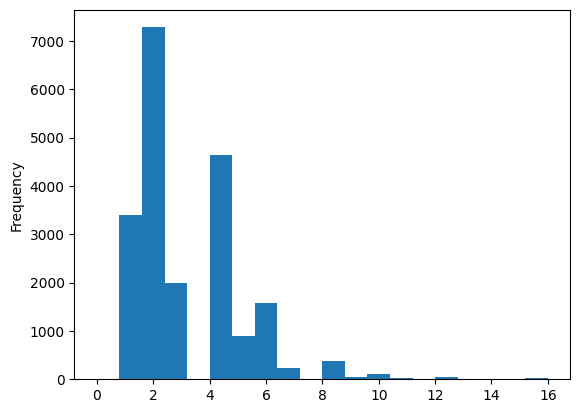

In [19]:
madrid['accommodates'].plot(kind='hist', bins=20)

In [20]:
madrid[['description', 'accommodates', 'distancia', 'price']].sort_values('distancia').head()

,description,accommodates,distancia,price
20680,Relájate y desconecta en este alojamiento tran...,4,0,$109.00
4889,Brand new apartment with good lighting and all...,4,0,$99.00
4887,Located in one of the most emblematic areas of...,4,0,$91.00
4885,PARA QUE SEA EFECTIVA LA RESERVA TIENE QUE SER...,4,0,$136.00
16691,Elegant 2 bedroom apartment with two bathrooms...,4,0,$109.00


In [21]:
madrid[['description', 'accommodates', 'distancia', 'price']].sort_values('distancia').head()

,description,accommodates,distancia,price
20680,Relájate y desconecta en este alojamiento tran...,4,0,$109.00
4889,Brand new apartment with good lighting and all...,4,0,$99.00
4887,Located in one of the most emblematic areas of...,4,0,$91.00
4885,PARA QUE SEA EFECTIVA LA RESERVA TIENE QUE SER...,4,0,$136.00
16691,Elegant 2 bedroom apartment with two bathrooms...,4,0,$109.00


Hemos introducido un sesgo porque el orden con el que venían podía no ser aleatorio
Tenemos que barajar

Esto se hace con `np.random.permutation`

In [22]:
np.random.permutation(4)

array([2, 3, 0, 1])

In [23]:
np.random.permutation(45)

array([ 8, 17, 36, 29,  0, 11, 10, 26, 14,  2, 32, 24, 41, 23, 39, 43,  3,
       22, 13, 25,  6, 37, 20, 12, 28,  7, 15, 44,  4, 38, 34, 40, 18, 19,
       21, 33, 27, 16, 30, 42, 35, 31,  5,  9,  1])

In [24]:
len(madrid)

20681

In [25]:
madrid.shape

(20681, 76)

In [26]:
madrid.shape[0]

20681

In [27]:
np.random.seed(788)

In [28]:
madrid = madrid.iloc[
    np.random.permutation(
        len(madrid)
    )
]

In [29]:
madrid.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,distancia
14079,51477663,https://www.airbnb.com/rooms/51477663,20220911230855,2022-09-12,city scrape,Confortable Habitación en zona del Retiro.,Disfruta de la sencillez de este alojamiento t...,Barrio tranquilo y comunicado con supermercado...,https://a0.muscache.com/pictures/0ca7707f-38af...,111405751,...,4.74,4.6,NaN,f,2,0,2,0,8.02,2
7381,31559404,https://www.airbnb.com/rooms/31559404,20220911230855,2022-09-12,city scrape,HABITACION CON CAMA DOBLE. SILLA Y ESCRITORIO...,"Is a 2 bedroom, furnished, with maximum capaci...",NaN,https://a0.muscache.com/pictures/37497124/aee3...,498646,...,NaN,NaN,NaN,t,4,1,3,0,NaN,3
13621,50416327,https://www.airbnb.com/rooms/50416327,20220911230855,2022-09-12,previous scrape,Room for students girls until 30 years old,Shared house with students or recently graduat...,The neighbourhood of Moratalaz is one of the b...,https://a0.muscache.com/pictures/4988d6e1-73d7...,16944831,...,NaN,NaN,NaN,f,17,0,17,0,NaN,3
14855,53126020,https://www.airbnb.com/rooms/53126020,20220911230855,2022-09-12,previous scrape,NAKA - Two bedroom apartment in Velazquez,Our mission is to empower individuals to immer...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,346367515,...,5.00,5.0,NaN,t,95,95,0,0,0.37,0
17493,628950317051971808,https://www.airbnb.com/rooms/628950317051971808,20220911230855,2022-09-12,city scrape,Habitación con baño privado en apto moderno,Este alojamiento único tiene personalidad prop...,NaN,https://a0.muscache.com/pictures/ae4b7730-1afd...,459585563,...,4.85,5.0,NaN,t,1,0,1,0,5.26,2


In [31]:
k_vecinos = madrid[['description', 'accommodates', 'distancia', 'price']].sort_values('distancia').iloc[0:5] # k = 5

In [33]:
#k_vecinos['price'].mean()

In [37]:
k_vecinos['price']

18318     $57.00
5187      $84.00
4030      $90.00
7422     $175.00
2877      $90.00
Name: price, dtype: object

- Eliminar el $
- Convertir a float

In [40]:
k_vecinos['price'].apply(lambda x: x.replace('$', '')) 

18318     57.00
5187      84.00
4030      90.00
7422     175.00
2877      90.00
Name: price, dtype: object

In [42]:
k_vecinos['price'].str.replace('$', '', regex= False)

18318     57.00
5187      84.00
4030      90.00
7422     175.00
2877      90.00
Name: price, dtype: object

In [43]:
k_vecinos['price'] = k_vecinos['price'].str.replace('$', '', regex= False)

In [44]:
k_vecinos

,description,accommodates,distancia,price
18318,"Clean, modern and recently renovated flat in M...",4,0,57.00
5187,Moderno apartamento con todo lujo de detalles ...,4,0,84.00
4030,Apartamento de 4 estancias independientes dorm...,4,0,90.00
7422,On the 5th floor of a representative building ...,4,0,175.00
2877,Zona segura y pintoresca en el elegante Distri...,4,0,90.00


In [46]:
k_vecinos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 18318 to 2877
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   5 non-null      object
 1   accommodates  5 non-null      int64 
 2   distancia     5 non-null      int64 
 3   price         5 non-null      object
dtypes: int64(2), object(2)
memory usage: 200.0+ bytes


In [49]:
k_vecinos['price'] =k_vecinos['price'].astype('float')

In [50]:
k_vecinos['price'].mean()

99.2

- K - elección del k ( en nuestro caso ha sido 5)
- la distribución o cálculo con los vecinos - > media aritmética...

In [52]:
madrid['price']

14079     $30.00
7381      $25.00
13621     $17.00
14855    $145.00
17493     $45.00
          ...   
8119     $599.00
14404     $91.00
8549     $133.00
11637    $171.00
18318     $57.00
Name: price, Length: 20681, dtype: object